# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.642  1  1.136 0.288 0.006   
                             age        0.060  1  0.105 0.746 0.001   
                             Kiel       2.077  1  3.679 0.057 0.019   
                             Magdeburg  4.964  1  8.790 0.003 0.044   
                             Sweden     8.794  1 15.574 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.019  1  0.019 0.889 0.000   
                             age        0.241  1  0.243 0.622 0.001   
                             Kiel       0.128  1  0.129 0.720 0.001   
                             Magdeburg  1.931  1  1.952 0.164 0.010   
                             Sweden    20.951  1 21.183 0.000 0.100   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.541  0.451    False  
                             age               0.127  0.842    False  
                             Kiel              1.247  0.134    False  
                             Magdeburg         2.467  0.014     True  
                             Sweden            3.953  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.051  0.940    False  
                             age               0.206  0.751    False  
                             Kiel              0.143  0.822    False  
                             Magdeburg         0.785  0.301    False  
                             Sweden            5.119  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.742  1  4.877 0.028 0.025   
                             age        0.007  1  0.046 0.830 0.000   
                             Kiel       0.368  1  2.418 0.122 0.013   
                             Magdeburg  0.844  1  5.553 0.019 0.028   
                             Sweden     2.266  1 14.903 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         4.441  1  2.303 0.131 0.012   
                             age        0.500  1  0.259 0.611 0.001   
                             Kiel       6.717  1  3.483 0.064 0.018   
                             Magdeburg 21.428  1 11.111 0.001 0.055   
                             Sweden     0.272  1  0.141 0.707 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.547  0.072    False  
                             age               0.081  0.892    False  
                             Kiel              0.915  0.227    False  
                             Magdeburg         1.711  0.053    False  
                             Sweden            3.810  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.883  0.241    False  
                             age               0.214  0.727    False  
                             Kiel              1.197  0.137    False  
                             Magdeburg         2.987  0.005     True  
                             Sweden            0.150  0.802    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.288         0.541  0.451    False   
                             age       0.746         0.127  0.842    False   
                             Kiel      0.057         1.247  0.134    False   
                             Magdeburg 0.003         2.467  0.014     True   
                             Sweden    0.000         3.953  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.889         0.051  0.940    False   
                             age       0.622         0.206  0.751    False   
                             Kiel      0.720         0.143  0.822    False   
                             Magdeburg 0.164         0.785  0.301    False   
                             Sweden    0.000         5.119  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.028         1.547  0.072    False  
                             age       0.830         0.081  0.892    False  
                             Kiel      0.122         0.915  0.227    False  
                             Magdeburg 0.019         1.711  0.053    False  
                             Sweden    0.000         3.810  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.131         0.883  0.241    False  
                             age       0.611         0.214  0.727    False  
                             Kiel      0.064         1.197  0.137    False  
                             Magdeburg 0.001         2.987  0.005     True  
                             Sweden    0.707         0.150  0.802    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.479     0.339     0.242         2.746     0.308
std       0.305         5.304     0.333     0.296         5.172     0.323
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.328     0.015     0.002         0.369     0.008
50%       0.121         0.916     0.243     0.091         1.039     0.183
75%       0.470         2.435     0.626     0.427         2.710     0.570
max       1.000       147.571     1.000     1.000        84.103     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.288         0.541   
A0A024R0T9;K7ER74;P02655                           AD     0.064         1.196   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.145         0.837   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.536         0.271   
A0A075B6H7                                         AD     0.140         0.852   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.013         1.872   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.366         0.437   
S4R3U6                                             AD     0.889         0.051   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.451    False   
A0A024R0T9;K7ER74;P02655                           AD      0.147    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.277    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.681    False   
A0A075B6H7                                         AD      0.271    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.043     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.529    False   
S4R3U6                                             AD      0.940    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.028         1.547   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.480   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.244         0.613   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.297         0.527   
A0A075B6H7                                         AD     0.246         0.609   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.070         1.154   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.940         0.027   
S4R3U6                                             AD     0.131         0.883   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.072    False  
A0A024R0T9;K7ER74;P02655                           AD      0.082    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.384    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.443    False  
A0A075B6H7                                         AD      0.387    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.406     0.338     0.243         1.500     0.314
std       0.291         1.648     0.317     0.289         1.773     0.312
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.013         0.357     0.041     0.010         0.370     0.030
50%       0.126         0.899     0.250     0.105         0.979     0.204
75%       0.440         1.899     0.599     0.427         2.017     0.570
max       0.999        22.890     0.999     0.999        25.391     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1043,988


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.288         0.541  0.451   
A0A024R0T9;K7ER74;P02655                           0.064         1.196  0.147   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.145         0.837  0.277   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.536         0.271  0.681   
A0A075B6H7                                         0.140         0.852  0.271   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.013         1.872  0.043   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.366         0.437  0.529   
S4R3U6                                             0.889         0.051  0.940   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.028   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.244   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.297   
A0A075B6H7                                            False 0.246   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.070   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.940   
S4R3U6                                                False 0.131   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.547  0.072   
A0A024R0T9;K7ER74;P02655                                   1.480  0.082   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.613  0.384   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.527  0.443   
A0A075B6H7                                                 0.609  0.387   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.300   
Q9Y6X5                                                     1.154  0.148   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.027  0.962   
S4R3U6                                                     0.883  0.241   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    959
PI (yes) - QRILC (yes)   349
PI (no)  - QRILC (yes)    84
PI (yes) - QRILC (no)     29
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.016         1.787  0.050    False   
A0A075B6J9                            0.040         1.399  0.102    False   
A0A075B7B8                            0.640         0.194  0.765    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.007         2.166  0.025     True   
A0A087WWT2;Q9NPD7                     0.026         1.578  0.074    False   
...                                     ...           ...    ...      ...   
Q9UKB5                                0.054         1.270  0.128    False   
Q9ULP0-3;Q9ULP0-6                     0.008         2.097  0.028     True   
Q9UQ52                                0.143         0.845  0.273    False   
Q9Y490                                0.012         1.925  0.039     True   
Q9Y6X5                                0.013         1.872  0.043     True   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.003         2.492  0.012     True   
A0A075B6J9                            0.009         2.057  0.028     True   
A0A075B7B8                            0.018         1.752  0.049     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.338         0.472  0.486    False   
A0A087WWT2;Q9NPD7                     0.005         2.271  0.018     True   
...                                     ...           ...    ...      ...   
Q9UKB5                                0.017         1.759  0.048     True   
Q9ULP0-3;Q9ULP0-6                     0.030         1.525  0.075    False   
Q9UQ52                                0.009         2.051  0.028     True   
Q9Y490                                0.980         0.009  0.988    False   
Q9Y6X5                                0.070         1.154  0.148    False   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A075B6J9                                  156  
A0A075B7B8                                   57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
...                                         ...  
Q9UKB5                                      148  
Q9ULP0-3;Q9ULP0-6                           136  
Q9UQ52                                      188  
Q9Y490                                       57  
Q9Y6X5                                      173  

[113 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.451,0.072,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.147,0.082,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.277,0.384,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.681,0.443,196,PI (no) - QRILC (no)
A0A075B6H7,0.271,0.387,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.300,197,PI (no) - QRILC (no)
Q9Y6X5,0.043,0.148,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q8N9I0,0.996,0.039,141,PI (no) - QRILC (yes),0.957
Q9Y490,0.039,0.988,57,PI (yes) - QRILC (no),0.949
Q13093,0.865,0.036,85,PI (no) - QRILC (yes),0.830
J3KSJ8;Q9UD71;Q9UD71-2,0.778,0.009,51,PI (no) - QRILC (yes),0.769
Q9NPC4,0.785,0.022,173,PI (no) - QRILC (yes),0.763
...,...,...,...,...,...
Q16706,0.052,0.042,195,PI (no) - QRILC (yes),0.010
K7ERG9;P00746,0.052,0.047,197,PI (no) - QRILC (yes),0.004
P00740;P00740-2,0.052,0.048,197,PI (no) - QRILC (yes),0.004


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


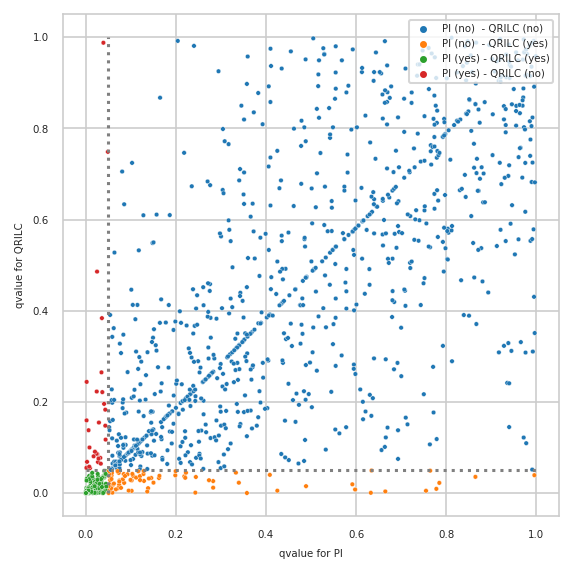

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


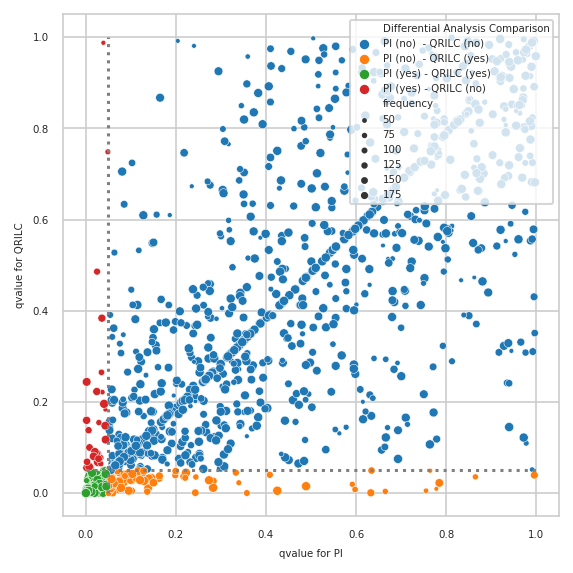

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out